# Algoritmos de detección de comunidades


A continuación, se detallan algunos algoritmos de detección de comunidades. Es necesario prestar atención a las características de las funciones que implementan los algoritmos, ya que el output de las mismas suele variar.

# Instalamos e importamos librerías

In [1]:
import networkx as nx # Para redes en general
import community as community_louvain 
import igraph as ig 
import matplotlib.pylab as plt # Para graficar 
import matplotlib.cm as cm # para mapas de colores
import numpy as np
import cairo 

# Ejercicio 1

### Inciso (a)

la partición en comunidades de esta red utilizando la metodología Louvain, infomap,
fast_greedy y edge_betweenness. Visualice los resultados gráficamente.

In [2]:
#cargamos la red de delfines
Red_delfines = nx.read_gml('./data/dolphins.gml')
posiciones = nx.kamada_kawai_layout(Red_delfines)

#definimos la red en Igraph desde la red en Networkx
Red_delfines_igraph = ig.Graph.TupleList(Red_delfines.edges(), directed=False)

In [3]:
# función que toma la Red de igraph y la partición calculada con Igraph, y la devuelve como diccionario
def convertir_particion_igraph_a_diccionario(Red_igraph,particion_igraph):
    particion_dict = {}
    for cluster in range(len(particion_igraph)):
        for nodo in Red_igraph.vs(particion_igraph[cluster])['name']:
            particion_dict.update({nodo:cluster})
    return particion_dict

def convertir_dict_a_lista(dict):
    categoria = set(dict.values())
    particiones = []
    for n in categoria:
        cluster = [k for k in dict.keys() if dict[k] == n]
        particiones.append(cluster)
    return particiones_louvline

#devuelve una lista de n colores hex
import random
def colores_hex(n):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(n)]
    return color

In [4]:
#calculamos las paticiones con los distintos métodos
particiones = {}

#particiones con Edge Betweenness
dendograma_edge_betweenness = Red_delfines_igraph.community_edge_betweenness(directed=False, weights=None)
particiones_edge_betweenness = dendograma_edge_betweenness.as_clustering()
dict_particiones_edge_betweenness = convertir_particion_igraph_a_diccionario(Red_delfines_igraph,particiones_edge_betweenness)
particiones['Edge_bet'] = dict_particiones_edge_betweenness

#particiones con Fast Greedy
dendograma_fast_greedy = Red_delfines_igraph.community_fastgreedy(weights=None)
particiones_fast_greedy = dendograma_fast_greedy.as_clustering()
dict_particiones_fast_greedy = convertir_particion_igraph_a_diccionario(Red_delfines_igraph,particiones_fast_greedy)
particiones['Fast_greedy'] = dict_particiones_fast_greedy

#particiones con Louvline
dict_particiones_louvline = community_louvain.best_partition(Red_delfines)
particiones['Louvline'] = dict_particiones_louvline
#convertir_dict_a_lista(dict_particiones_louvline)

#particiones con infomap
particiones_infomap = Red_delfines_igraph.community_infomap()
dict_particiones_infomap = convertir_particion_igraph_a_diccionario(Red_delfines_igraph,particiones_infomap)
particiones['Infomap'] = dict_particiones_infomap

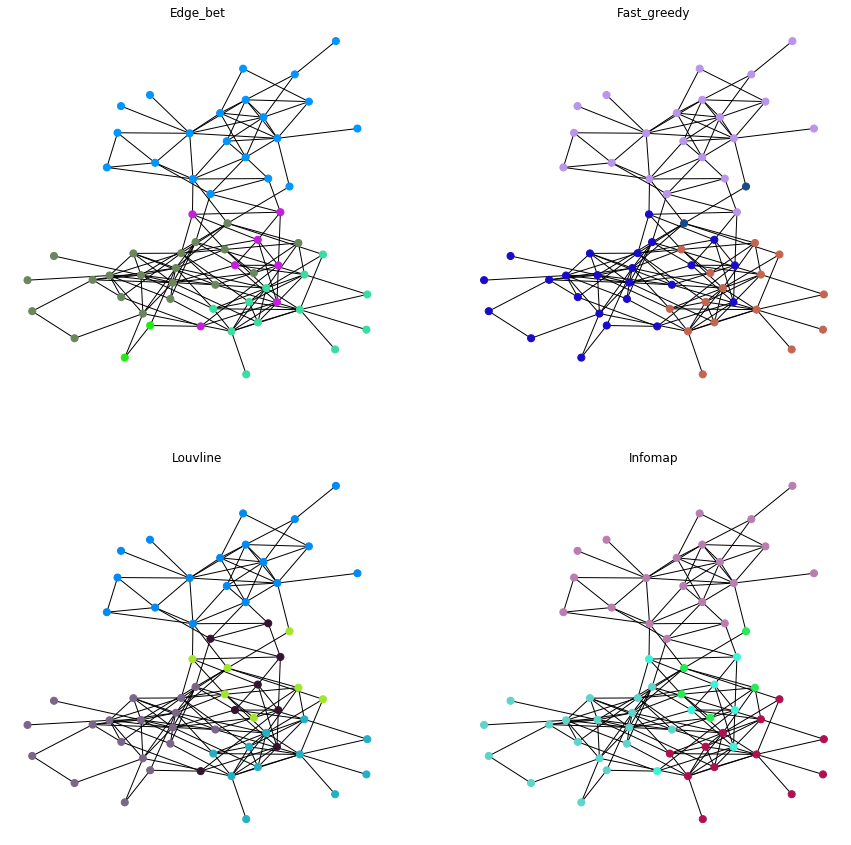

In [5]:
#dendograma_fast_greedy.optimal_count
f, axs = plt.subplots(2, 2, figsize=(15,15))
axs = axs.flatten()
for i,metodo in enumerate(particiones):
    particion = particiones[metodo]
    colores = colores_hex(max(particion.values())+1) #funcion que devuelve n colores

  # le asigno un color a cada nodo
    node_color = []
    for node in Red_delfines.nodes():
        node_color.append(colores[particion[node]])

    nx.draw(Red_delfines, node_size= 50, ax = axs[i], node_color=node_color,pos=posiciones )
    axs[i].set_title(metodo)

plt.show()

In [6]:
%store -r masculinos
%store -r femeninos
%store -r sin_genero
%store -r gender_dict

Lo vamos a graficar ahora poniendo también los géneros. Para eso agrego un atributo de forma a cada nodo según su género. 

In [7]:
shape_dict = {}
for nodo in Red_delfines.nodes(): 
    if gender_dict[nodo] == 'm':
        shape_dict[nodo] = 's' 
    if gender_dict[nodo] == 'f':
        shape_dict[nodo] = '*' 
    if gender_dict[nodo] == 'NA':
        shape_dict[nodo] = '^'
nx.set_node_attributes(Red_delfines, shape_dict, 'shape')

shapes = set([nodo[1]['shape'] for nodo in Red_delfines.nodes(data = True)])

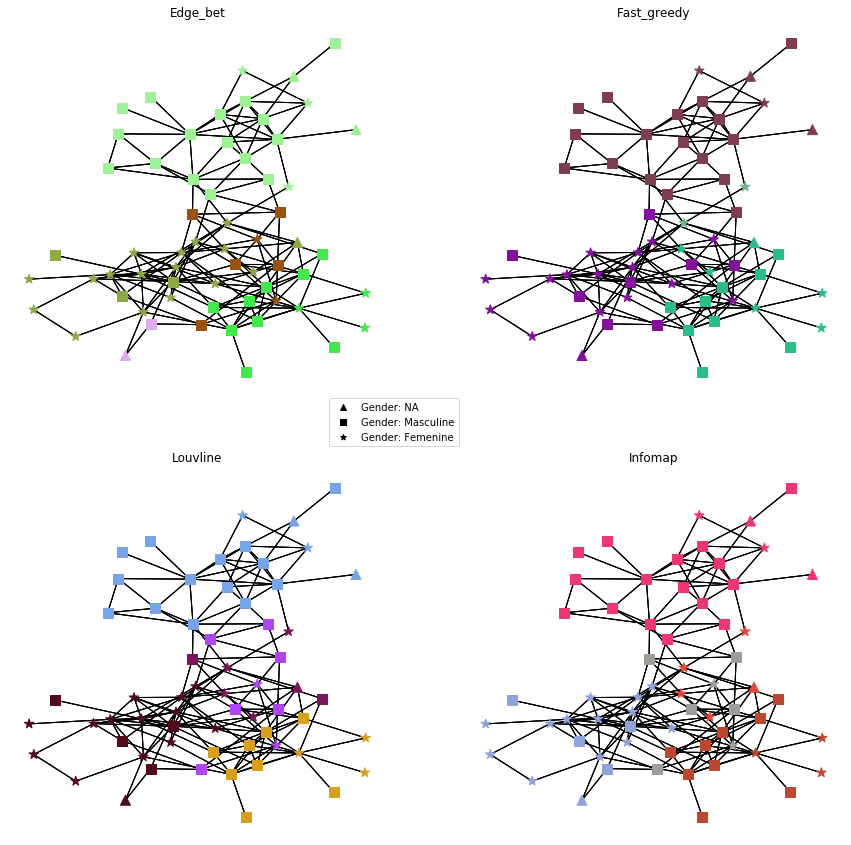

In [45]:
f, axs = plt.subplots(2, 2, figsize=(15,15))
axs = axs.flatten()
for i,metodo in enumerate(particiones):
    particion = particiones[metodo]
    colores = colores_hex(max(particion.values())+1) #funcion que devuelve n colores

    node_color_dict = {}
    for node in Red_delfines.nodes():
        node_color_dict[node] = colores[particion[node]]
            
    for aShape in shapes: 
        
        node_list = [sNode for sNode, attr in Red_delfines.nodes(data = True) if attr['shape'] == aShape]
        node_color = [node_color_dict[sNode] for sNode in node_list]
        nx.draw(Red_delfines, node_size= 100, ax = axs[i], node_color = node_color,pos=posiciones, node_shape = aShape,  nodelist = node_list)
    
    axs[i].set_title(metodo)
    
    label = {'s': 'Masculine', '*':'Femenine', '^':"NA"}
for aShape in shapes:
    plt.scatter([],[], c = 'black', marker = aShape, label='Gender: {}'.format(label[aShape]))

plt.legend(bbox_to_anchor=(0, 1.2))
plt.show()

In [9]:
%store particiones

Stored 'particiones' (dict)
